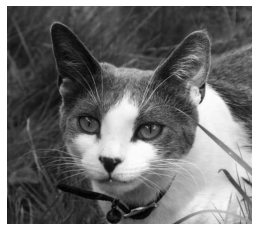

True
[[ 58.33333333+7.98666688e-15j  59.33333333+2.19962937e-15j
   61.33333333+8.29371294e-15j ...  48.        -1.67522246e-14j
   51.33333333+4.54497551e-16j  55.        +1.79908172e-14j]
 [ 56.33333333+6.48786580e-15j  58.33333333+1.54737334e-15j
   60.33333333+6.16694196e-15j ...  51.        -9.25474974e-15j
   55.33333333+7.30318583e-15j  59.        +1.68077358e-14j]
 [ 54.33333333+6.70991041e-15j  55.33333333+2.28289609e-15j
   57.33333333+4.94569663e-15j ...  56.        +1.03927283e-14j
   61.33333333-7.26155247e-15j  65.        +3.05831749e-15j]
 ...
 [ 62.        +1.07136522e-14j  60.        +3.60128594e-15j
   56.33333333-3.52669283e-15j ... 209.33333333-2.05790246e-14j
  198.33333333-1.64000757e-14j 187.33333333+1.06182424e-14j]
 [ 64.33333333+1.27883815e-14j  62.33333333+8.13932255e-15j
   59.66666667-1.46237189e-15j ... 210.33333333-1.53089347e-14j
  201.33333333-1.14804000e-14j 191.33333333-2.76948603e-14j]
 [ 65.33333333+7.04644676e-15j  63.66666667-3.06352166e-15j
   61

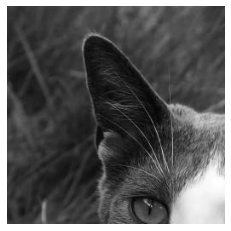

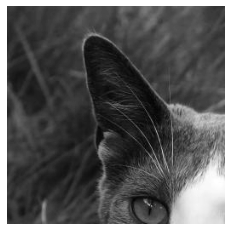

In [10]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

def FFT(Img, Wn,axis):
    if Img.shape[axis] == 2:     # base case(F_2)
        pic = np.zeros(Img.shape, dtype=complex)
        if axis == 1:
            pic[:,0] = Img[:,0] + Img[:,1] * Wn[:,0]
            pic[:,1] = Img[:,0] - Img[:,1] * Wn[:,0]
        elif axis == 0:
            pic[0,:] = Img[0,:] + Img[1,:] * Wn[0,:]
            pic[1,:] = Img[0,:] - Img[1,:] * Wn[0,:]
        return pic
    else:
        pic = np.empty(Img.shape, dtype=complex)
        if axis == 1:       # kepp recursion
            I_Fn = FFT(Img[:,::2], Wn[:,::2],axis)
            # split odd columns and even columns 
            Dn_Fn = FFT(Img[:,1::2], Wn[:,::2],axis)
            pic[:,0:Img.shape[1] // 2] = I_Fn + Wn * Dn_Fn
            # the forth part is -DnFn
            pic[:,Img.shape[1] // 2:Img.shape[1]] = I_Fn - Wn * Dn_Fn
        elif axis == 0:
            # Just same as the axis 0 part 
            I_Fn = FFT(Img[::2,:], Wn[::2,:], axis)
            Dn_Fn = FFT(Img[1::2,:], Wn[::2,:], axis)
            pic[0:Img.shape[0] // 2,:] = I_Fn + Wn * Dn_Fn
            pic[Img.shape[0] // 2:Img.shape[0],:] = I_Fn - Wn * Dn_Fn
        return pic


def FFT_1D(Img,axis):
    # the rotation factor.For f(t) omiga = e^(-i(n*pi*t)/N)
    Wn = np.zeros(Img.shape,dtype=complex)  # Initialize the Wn
    
    # Do the calculations separately for both axes
    if axis == 0:
        Wn = np.zeros((Img.shape[0]//2,Img.shape[1]), dtype=complex)   # Initialize
        temp = np.array([
        # we set the period is 2pi and Equidistant sampling
        # 1j is the imaginary part 
        np.cos(2*np.pi*i/Img.shape[0]) - 1j*np.sin(2*np.pi*i/Img.shape[0]) for i in range(Img.shape[0]//2)])
        for i in range(Wn.shape[1]):
            Wn[:,i] = temp
    # smae as axis 0
    elif axis == 1:
        Wn = np.zeros((Img.shape[0], Img.shape[1]//2), dtype=complex)
        # 1j is the imaginary part 
        temp = np.array([
            np.cos(2 * np.pi * i / Img.shape[1]) - 1j * np.sin(2 * np.pi * i / Img.shape[1]) for i in
            range(Img.shape[1] // 2)])
        for i in range(Wn.shape[0]):
            Wn[i,:] = temp
    return rawFFT(Img, Wn,axis)


def iFFT_1d(Img,axis):
    Wn = np.zeros(Img.shape,dtype=complex)
    if axis == 0:
        Wn = np.zeros((Img.shape[0]//2,Img.shape[1]), dtype=complex)
        temp = np.array([
            # 1j is the imaginary part 
            np.cos(2*np.pi*i/Img.shape[0]) + 1j*np.sin(2*np.pi*i/Img.shape[0]) for i in range(Img.shape[0]//2)])
        for i in range(Wn.shape[1]):
            Wn[:,i] = temp
    elif axis == 1:
        Wn = np.zeros((Img.shape[0], Img.shape[1]//2), dtype=complex)
        temp = np.array([
            np.cos(2 * np.pi * i / Img.shape[1]) + 1j * np.sin(2 * np.pi * i / Img.shape[1]) for i in
            range(Img.shape[1] // 2)])
        for i in range(Wn.shape[0]):
            Wn[i,:] = temp

    return rawFFT(Img, Wn,axis)*(1.0/Img.shape[axis])


def FFT_2d(Img):
    '''
    only for gray scale 2d-img. otherwise return 0 img with the same size of Img
    :param Img: img to be fourior transform
    :return: img been transformed
    '''
    imgsize = Img.shape
    pic = np.zeros(imgsize, dtype=complex)
    if len(imgsize) == 2:
        N = 2
        while N < imgsize[0]:
            N = N << 1
        num1 = N - imgsize[0]

        N = 2
        while N < imgsize[1]:
            N = N << 1
        num2 = N - imgsize[1]
        # Prevent image edge information loss
        # For Axis 0, 'edge' argument means to fill with edge value, axis 1 part is not filled (0,0),
        pic = FFT_1D(np.pad(Img, ((num1 // 2, num1 - num1 // 2), (0, 0)), 'edge'), 0) \
        [num1 // 2:num1 // 2 + imgsize[0], :]
        
        # For Axis 1, 'edge' argument means to fill with edge value, axis 0 part is not filled (0,0),
        pic = FFT_1D(np.pad(pic, ((0, 0), (num2 // 2, num2 - num2 // 2)), 'edge'), 1) \
        [:, num2 // 2:num2 // 2 + imgsize[1]]

    return pic


def iFFT_2d(Img):
    '''
    only for gray scale 2d-img. otherwise return 0 img with the same size of Img
    :param Img: img to be fourior transform
    :return: img been transformed
    '''
    imgsize = Img.shape
    pic = np.zeros(imgsize, dtype=complex)
    if len(imgsize) == 2:
        N = 2
        while N < imgsize[0]:
            N = N << 1
        num1 = N - imgsize[0]

        N = 2
        while N < imgsize[1]:
            N = N << 1
        num2 = N - imgsize[1]
        
        
        pic = iFFT_1d(np.pad(Img,((num1//2,num1-num1//2),(0,0)),'edge'),0)[num1//2:num1//2+imgsize[0],:]  # ,constant_values=(255,255)
        pic = iFFT_1d(np.pad(pic,((0,0),(num2//2,num2-num2//2)),'edge'),1)[:,num2//2:num2//2+imgsize[1]]  # ,constant_values=(255,255)

    return pic


if __name__ == "__main__":
    img = plt.imread('./img/1.jpg')
    img = img.mean(2)       # gray 2d


    plt.imshow(img.astype(np.uint8),cmap='gray')
    plt.axis('off')
    plt.show()

    F1 = np.fft.fft2(img[:256, :256])
    F2 = FFT_2d(img[:256, :256])
    print((abs(F1 - F2) < 0.0000001).all())

    F1 = np.fft.ifft2(F1)
    F2 = iFFT_2d(F2)
    print(F1)
    print('=================================================')
    print(F2)
    print((abs(F1 - F2) < 0.0000001).all())

    F2 = np.abs(F2)
    F2[F2 > 255] = 255

    plt.imshow(F2.astype(np.uint8), cmap='gray')
    plt.axis('off')
    plt.show()

    F1 = np.abs(F1)
    F1[F1 > 255] = 255

    plt.imshow(F1.astype(np.uint8), cmap='gray')
    plt.axis('off')
    plt.show()